# Coronavirus Data Analysis
*by: Carolina Migliorelli*

This notebook analyse coronavirus data from different sources and plot some global data and some data from Spain.

__Data Repositories:__

* https://github.com/CSSEGISandData/COVID-19
* https://github.com/datadista/datasets/tree/master/COVID%2019

## Casos Globales

Text(0.5, 1.0, 'Number of deaths (using as day 0 the day of the 50 death)')

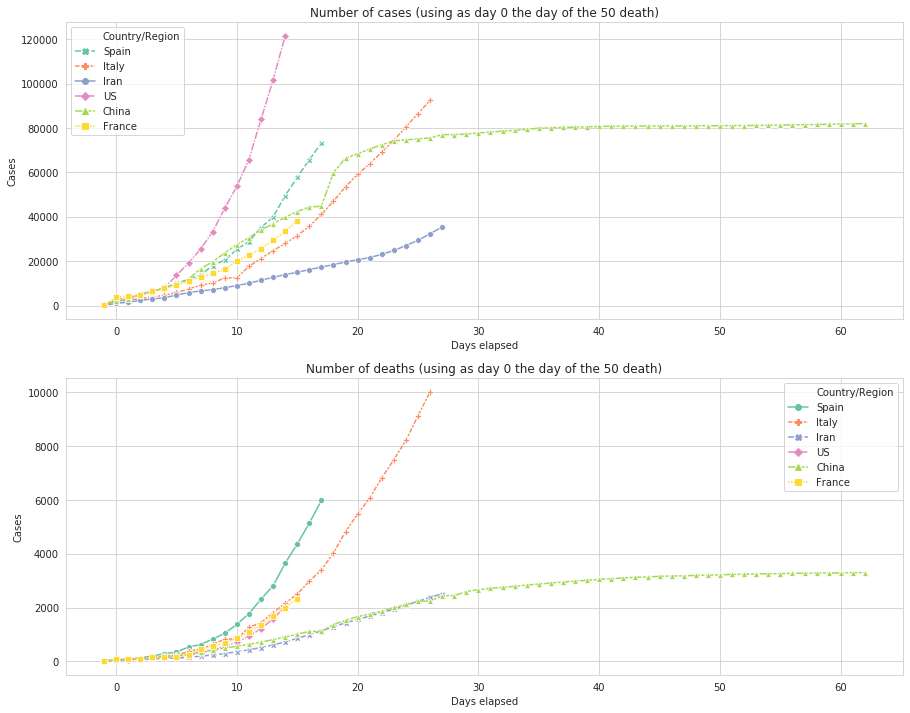

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
## Read Data for Cases, Deaths and Recoveries
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
Recoveries_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


### Melt the dateframe into the right shape and set index
def cleandata(df_raw):
    df_cleaned=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Cases',var_name='Date')
    return df_cleaned 

def processdata(df_cleaned):
    df_cleaned['Year'] = pd.DatetimeIndex(df_cleaned['Date']).year
    df_cleaned['Month'] = pd.DatetimeIndex(df_cleaned['Date']).month
    df_cleaned['Day'] = pd.DatetimeIndex(df_cleaned['Date']).day
    df_cleaned = df_cleaned.groupby(['Country/Region','Date','Year','Month','Day']).sum().reset_index()
    df_proc=df_cleaned.sort_values(by=['Cases'])
    return df_proc



# Clean all datasets
ConfirmedCases=cleandata(ConfirmedCases_raw)
Deaths=cleandata(Deaths_raw)
Recoveries=cleandata(Recoveries_raw)

# Select countries to plot
countries = ['Spain','Italy','Iran','US','China','France']


Confirmed_aux = ConfirmedCases[ConfirmedCases['Country/Region'].isin(countries)]
Confirmed_aux = processdata(Confirmed_aux)

Recoveries_aux = Recoveries[Recoveries['Country/Region'].isin(countries)]
Recoveries_aux = processdata(Recoveries_aux)



Deaths_aux = Deaths[Deaths['Country/Region'].isin(countries)]
Deaths_aux = processdata(Deaths_aux)
# Define day when the Xth death happened as the day "0"
day0 = 50
Deaths_aux['Days elapsed'] = -1
for country in countries:
    days_elapsed = (len(Deaths_aux[(Deaths_aux['Cases']>day0) & (Deaths_aux['Country/Region']==country)]))
    Deaths_aux['Days elapsed'][(Deaths_aux['Cases']>day0) & (Deaths_aux['Country/Region']==country)]=np.arange(0,days_elapsed)

Confirmed_aux['Days elapsed'] = Deaths_aux['Days elapsed']
Recoveries_aux['Days elapsed'] = Deaths_aux['Days elapsed']
    
    
sns.set_style("whitegrid")
fig_size = (15,12)
fig, ax = plt.subplots(2,figsize=fig_size)
sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=Confirmed_aux, palette='Set2',style="Country/Region", markers=True,
               ax=ax[0],hue_order=countries)
ax[0].set_title('Number of cases (using as day 0 the day of the ' +  str(day0) + ' death)')    
    
sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=Deaths_aux, palette='Set2',style="Country/Region", markers=True,
            ax=ax[1],hue_order=countries)
ax[1].set_title('Number of deaths (using as day 0 the day of the ' +  str(day0) + ' death)')


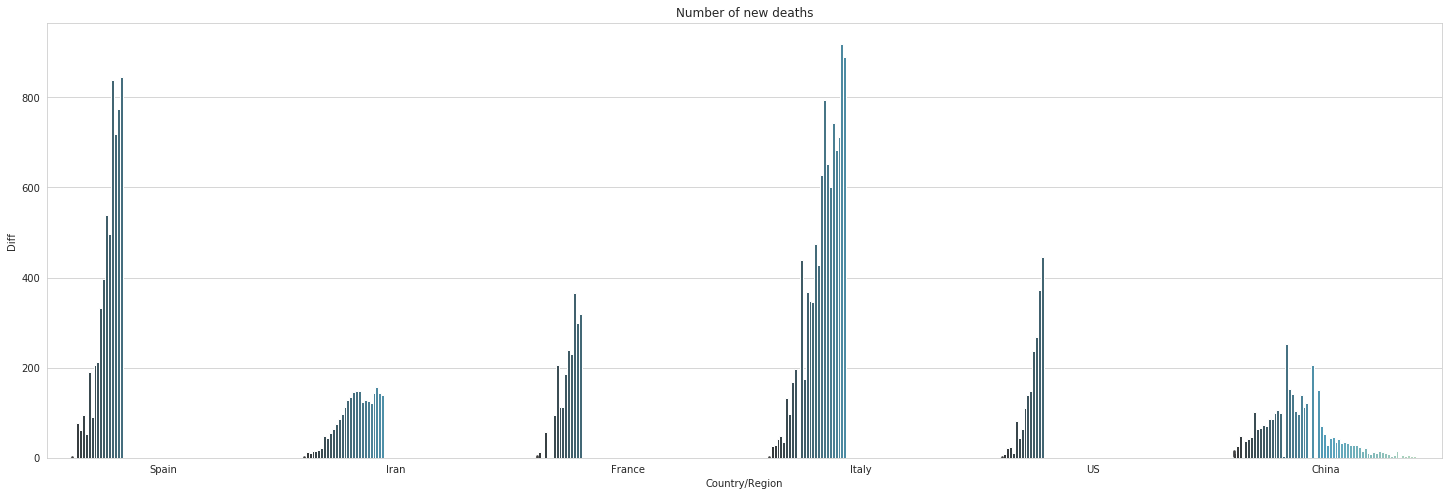

In [142]:
Deaths_aux['Diff'] = 0
for country in countries:
    aux = np.diff(Deaths_aux[Deaths_aux['Country/Region']==country]['Cases'].values)
    val = 0
    Deaths_aux['Diff'][Deaths_aux['Country/Region']==country] = (np.append(aux,val))    

# Plot the number of cases DAY BY DAY
fig_size = (25,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Diff", data=Deaths_aux,hue='Days elapsed',palette='GnBu_d')
ax.set_title('Number of new deaths')
ax.get_legend().remove()


## Casos de España

In [143]:
spain_cases=pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos.csv')
spain_cases = spain_cases.drop(columns=['cod_ine'])
spain_cases = spain_cases.melt(id_vars='CCAA',value_name='Cases',var_name='Date')
spain_cases = spain_cases.rename(columns={'CCAA':'Country/Region'}) 
date = spain_cases['Date'].str.split('-', n = 2, expand = True) 
spain_cases['Year'] = date[0]
spain_cases['Month'] = date[1]
spain_cases['Day'] = date[2]
spain_cases = spain_cases.sort_values(by=['Cases'])
#spain_cases = spain_cases.drop(columns=['Date'])

Text(0.5, 1.0, 'Casos por comunidades. Dia 0:50')

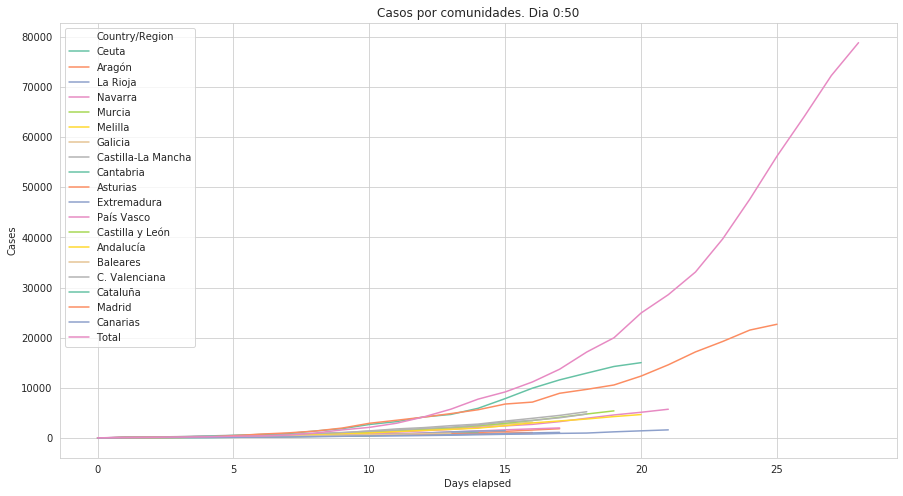

In [144]:
day0 = 50
autonomies = spain_cases['Country/Region'].unique()
spain_cases['Days elapsed'] = 0
for autonomy in autonomies:
    days_elapsed = (len(spain_cases[(spain_cases['Cases']>day0) & (spain_cases['Country/Region']==autonomy)]))
    spain_cases['Days elapsed'][(spain_cases['Cases']>day0) & (spain_cases['Country/Region']==autonomy)]=np.arange(0,days_elapsed)



sns.set_style("whitegrid")
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
ax=sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=spain_cases, palette='Set2', markers=True)
ax.set_title('Casos por comunidades. Dia 0:' + str(day0))

Text(0.5, 1.0, 'Casos por comunidades más afectadas. Dia 0:50')

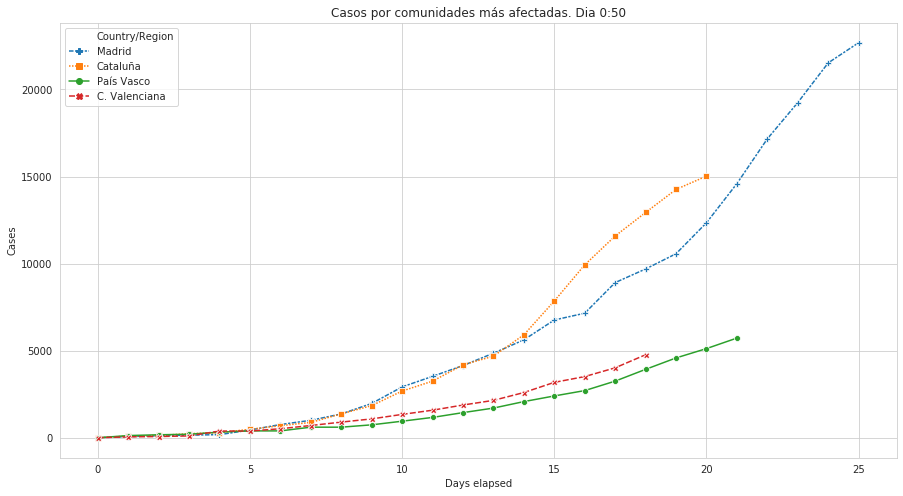

In [145]:
day0 = 50
autonomies = ['Madrid','Cataluña','País Vasco','C. Valenciana']
spain_cases_aux = spain_cases[spain_cases['Country/Region'].isin(autonomies)]
spain_cases_aux['Days elapsed'] = 0
for autonomy in autonomies:
    days_elapsed = (len(spain_cases_aux[(spain_cases_aux['Cases']>day0) & (spain_cases_aux['Country/Region']==autonomy)]))
    spain_cases_aux['Days elapsed'][(spain_cases_aux['Cases']>day0) & (spain_cases_aux['Country/Region']==autonomy)]=np.arange(0,days_elapsed)



sns.set_style("whitegrid")
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
ax=sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=spain_cases_aux, palette='tab10', markers=True, style = 'Country/Region', hue_order=autonomies)
ax.set_title('Casos por comunidades más afectadas. Dia 0:' + str(day0))

Text(0.5, 1.0, 'Incremento de casos')

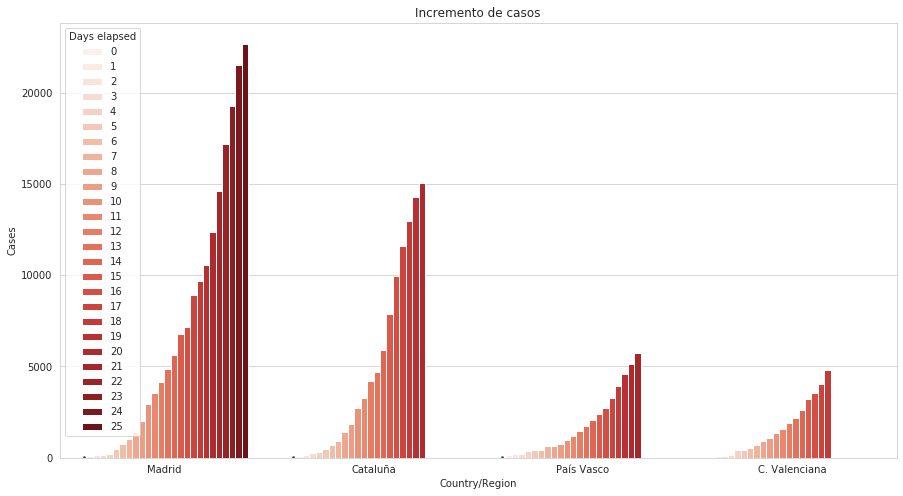

In [146]:
# Plot the number of cases  by days elapsed 
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Cases", data=spain_cases_aux,hue='Days elapsed',palette='Reds',order=autonomies)
ax.set_title('Incremento de casos')

Text(0.5, 1.0, 'Numero de casos nuevos')

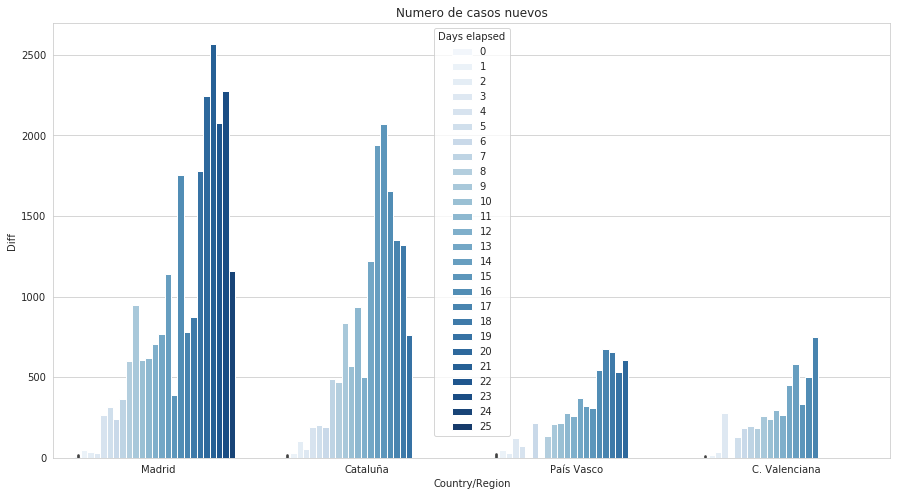

In [147]:
spain_cases_aux['Diff'] = 0
for autonomy in autonomies:
    aux = np.diff(spain_cases_aux[spain_cases_aux['Country/Region']==autonomy]['Cases'].values)
    val = 0
    spain_cases_aux['Diff'][spain_cases_aux['Country/Region']==autonomy] = (np.append(aux,val))    


# Plot the number of cases DAY BY DAY
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Diff", data=spain_cases_aux,hue='Days elapsed',palette='Blues',order= autonomies)
ax.set_title('Numero de casos nuevos')


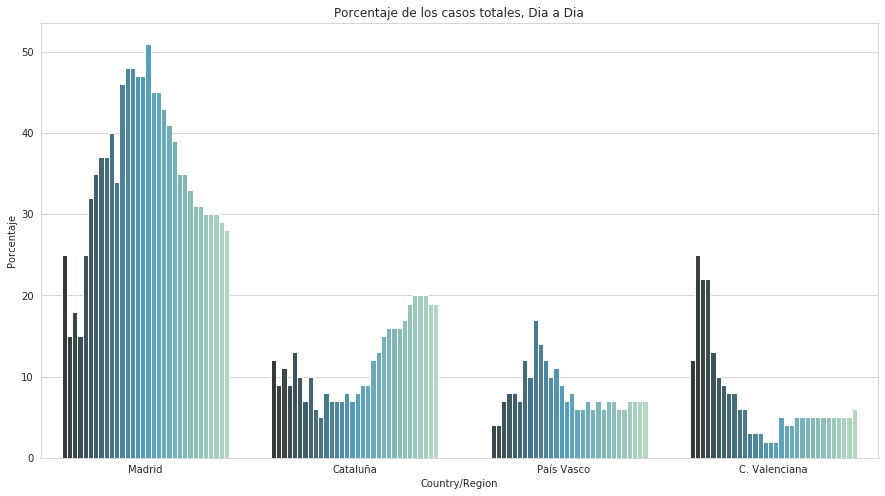

In [148]:
spain_cases['Aux'] = spain_cases['Year']+spain_cases['Month']+spain_cases['Day']
spain_cases = spain_cases.sort_values(by=['Aux'])
spain_cases['Porcentaje'] = 0
for day in spain_cases['Aux'].unique():
    values = spain_cases['Cases'][(spain_cases['Aux']==day)].values
    total = spain_cases['Cases'][(spain_cases['Aux']==day) & (spain_cases['Country/Region'] == 'Total')].values  
    if total != 0:
        spain_cases['Porcentaje'][(spain_cases['Aux']==day)] = 100*values/total

spain_cases_aux = spain_cases[spain_cases['Country/Region'].isin(autonomies)]
# Plot the number of cases DAY BY DAY
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Porcentaje", data=spain_cases_aux,hue='Aux',palette='GnBu_d',order = autonomies)
ax.set_title('Porcentaje de los casos totales, Dia a Dia')
ax.get_legend().remove()

## Fallecidos España

In [149]:
spain_cases=pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_fallecidos.csv')
spain_cases = spain_cases.drop(columns=['cod_ine'])
spain_cases = spain_cases.melt(id_vars='CCAA',value_name='Cases',var_name='Date')
spain_cases = spain_cases.rename(columns={'CCAA':'Country/Region'}) 
date = spain_cases['Date'].str.split('-', n = 2, expand = True) 
spain_cases['Year'] = date[0]
spain_cases['Month'] = date[1]
spain_cases['Day'] = date[2]
spain_cases = spain_cases.sort_values(by=['Cases'])
#spain_cases = spain_cases.drop(columns=['Date'])

Text(0.5, 1.0, 'Fallecidos por comunidades. Dia 0:10')

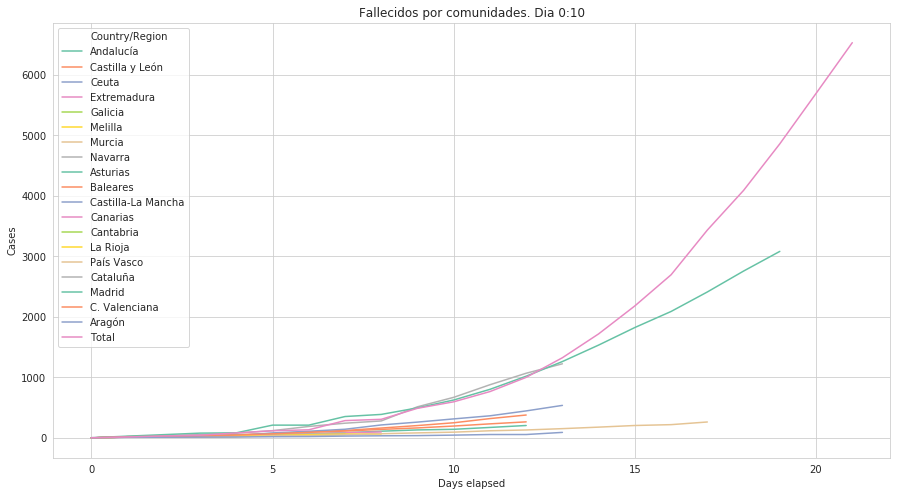

In [150]:
day0 = 10
autonomies = spain_cases['Country/Region'].unique()
spain_cases['Days elapsed'] = 0
for autonomy in autonomies:
    days_elapsed = (len(spain_cases[(spain_cases['Cases']>day0) & (spain_cases['Country/Region']==autonomy)]))
    spain_cases['Days elapsed'][(spain_cases['Cases']>day0) & (spain_cases['Country/Region']==autonomy)]=np.arange(0,days_elapsed)



sns.set_style("whitegrid")
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
ax=sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=spain_cases, palette='Set2', markers=True)
ax.set_title('Fallecidos por comunidades. Dia 0:' + str(day0))

Text(0.5, 1.0, 'Fallecidos por comunidades más afectadas. Dia 0:10')

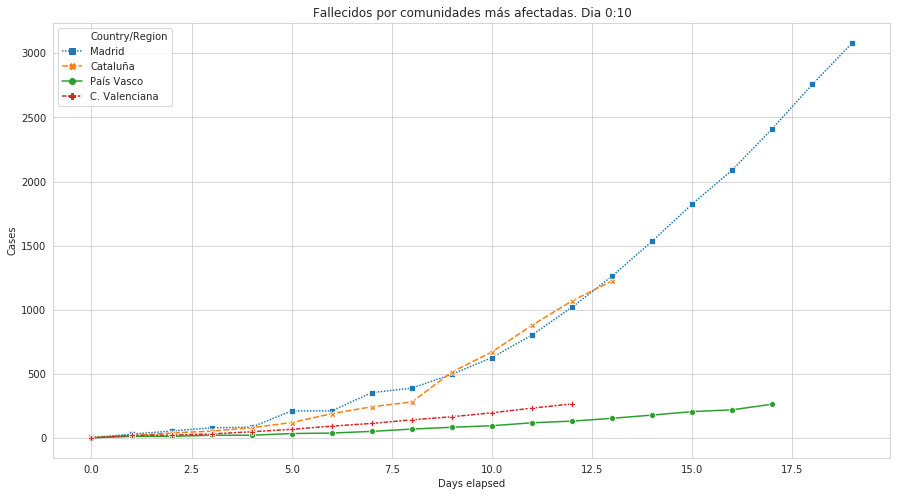

In [151]:
day0 = 10
autonomies = ['Madrid','Cataluña','País Vasco','C. Valenciana']
spain_cases_aux = spain_cases[spain_cases['Country/Region'].isin(autonomies)]
spain_cases_aux['Days elapsed'] = 0
for autonomy in autonomies:
    days_elapsed = (len(spain_cases_aux[(spain_cases_aux['Cases']>day0) & (spain_cases_aux['Country/Region']==autonomy)]))
    spain_cases_aux['Days elapsed'][(spain_cases_aux['Cases']>day0) & (spain_cases_aux['Country/Region']==autonomy)]=np.arange(0,days_elapsed)



sns.set_style("whitegrid")
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
ax=sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=spain_cases_aux, palette='tab10', markers=True, style = 'Country/Region', hue_order=autonomies)
ax.set_title('Fallecidos por comunidades más afectadas. Dia 0:' + str(day0))

Text(0.5, 1.0, 'Incremento de Fallecidos')

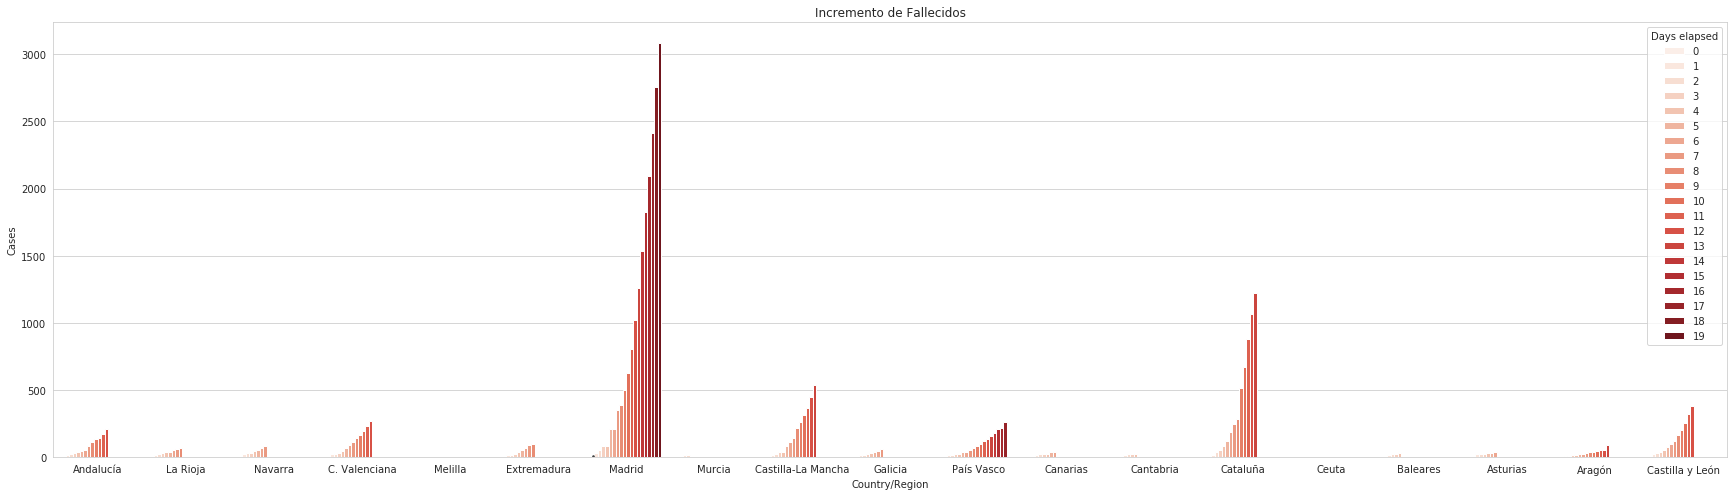

In [163]:
autonomies = spain_cases['Country/Region'].unique()
autonomies = autonomies[autonomies != 'Total']
spain_cases_aux = spain_cases[spain_cases['Country/Region'].isin(autonomies)]

# Plot the number of cases  by days elapsed 
fig_size = (30,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Cases", data=spain_cases_aux,hue='Days elapsed',palette='Reds',order=autonomies)
ax.set_title('Incremento de Fallecidos')

Text(0.5, 1.0, 'Numero de fallecidos nuevos')

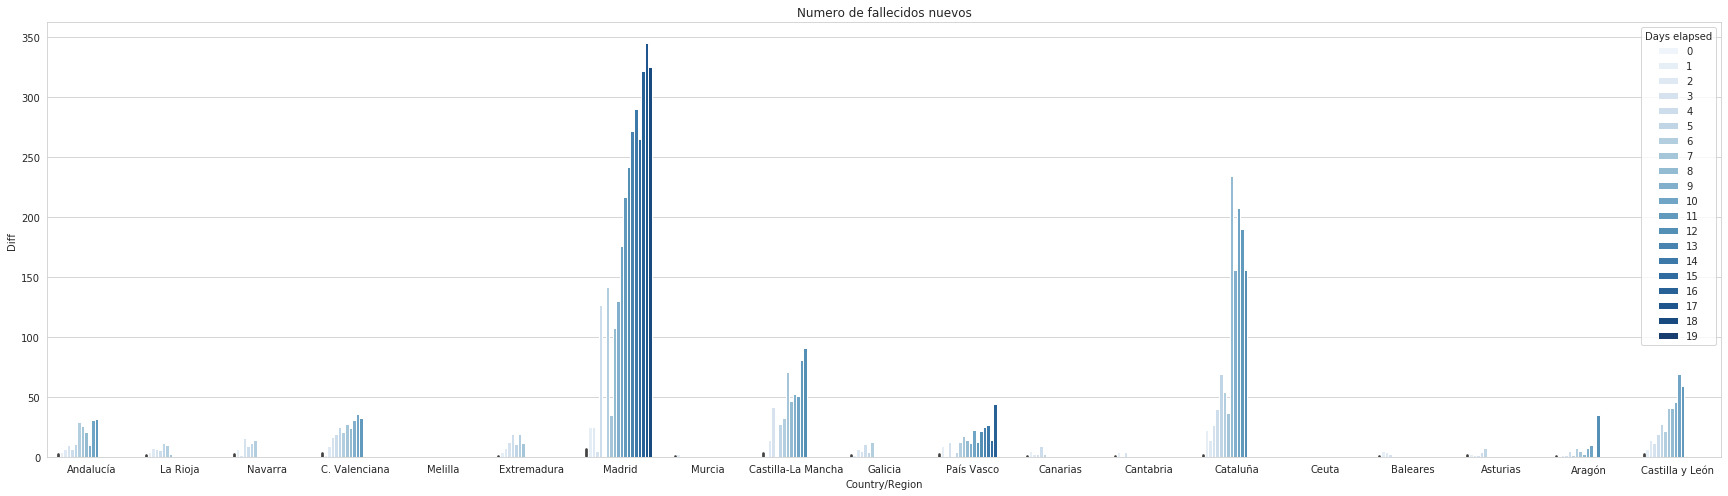

In [164]:
spain_cases_aux['Diff'] = 0
for autonomy in autonomies:
    aux = np.diff(spain_cases_aux[spain_cases_aux['Country/Region']==autonomy]['Cases'].values)
    val = 0
    spain_cases_aux['Diff'][spain_cases_aux['Country/Region']==autonomy] = (np.append(aux,val))    


# Plot the number of cases DAY BY DAY
fig_size = (30,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Diff", data=spain_cases_aux,hue='Days elapsed',palette='Blues',order=autonomies)
ax.set_title('Numero de fallecidos nuevos')

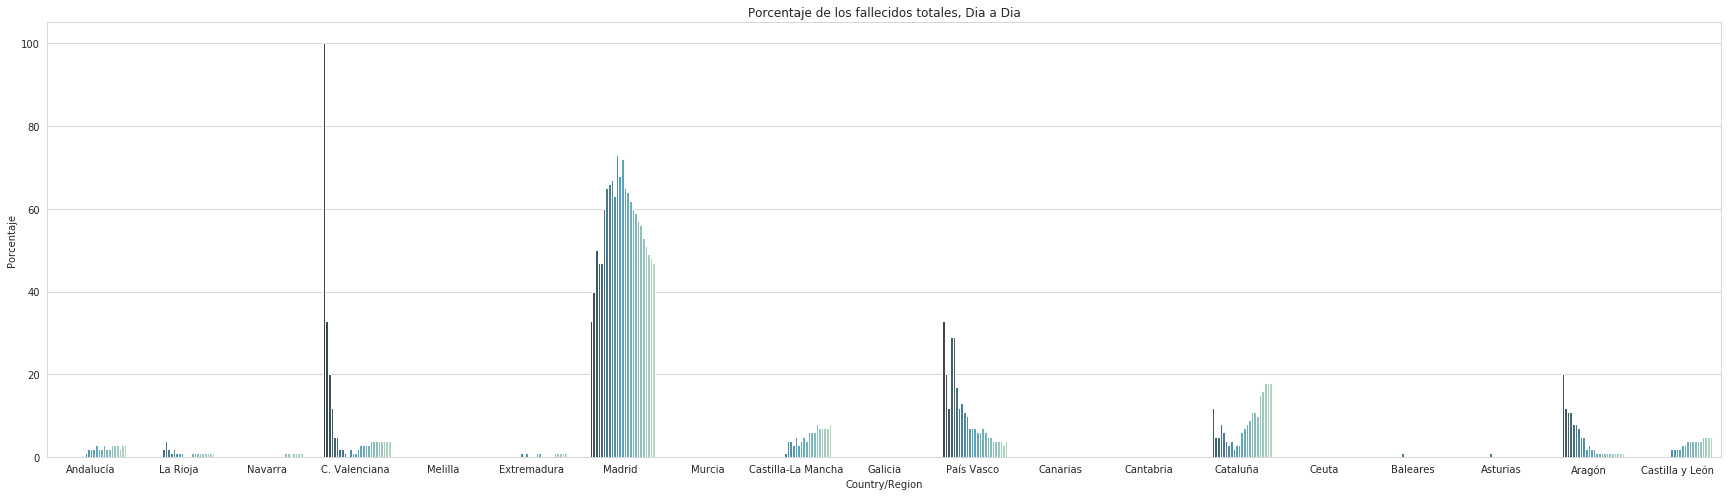

In [165]:
spain_cases['Aux'] = spain_cases['Year']+spain_cases['Month']+spain_cases['Day']
spain_cases = spain_cases.sort_values(by=['Aux'])
spain_cases['Porcentaje'] = 0
for day in spain_cases['Aux'].unique():    
    values = spain_cases['Cases'][(spain_cases['Aux']==day)].values
    total = spain_cases['Cases'][(spain_cases['Aux']==day) & (spain_cases['Country/Region'] == 'Total')].values   
    if total!=0:
        spain_cases['Porcentaje'][(spain_cases['Aux']==day)] = 100*values/total

#spain_cases_aux = spain_cases[spain_cases['Country/Region'].isin(autonomies)]
# Plot the number of cases DAY BY DAY
fig_size = (30,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="Country/Region", y="Porcentaje", data=spain_cases,hue='Aux',palette='GnBu_d', order=autonomies)
ax.set_title('Porcentaje de los fallecidos totales, Dia a Dia')
ax.get_legend().remove()

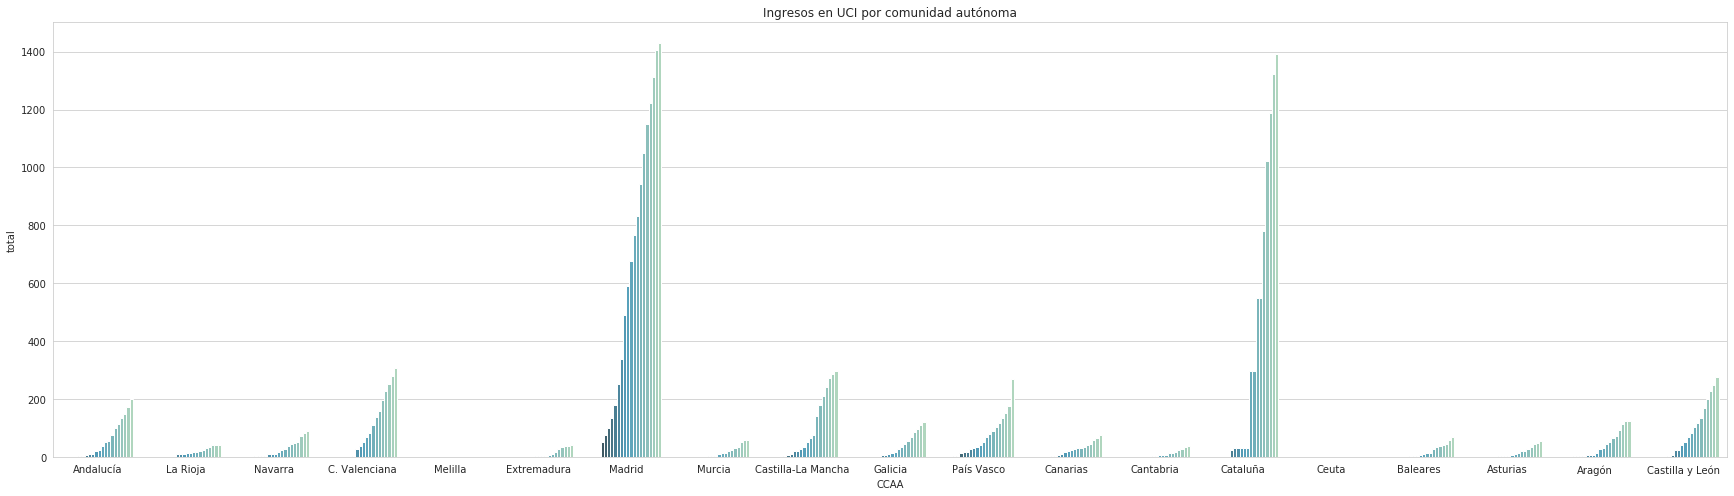

In [166]:
uci = pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_uci_long.csv')
uci=uci[uci['CCAA']!='Total']
#autonomies = uci['CCAA'].unique()
fig_size = (30,8)
fig, ax = plt.subplots(figsize=fig_size)
sns.barplot(x="CCAA", y="total", data=uci,hue='fecha',palette='GnBu_d',order=autonomies)
ax.set_title('Ingresos en UCI por comunidad autónoma')
ax.get_legend().remove()


## Analisis por edad

In [158]:
spain_ages = pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/nacional_covid19_rango_edad.csv')
spain_ages=spain_ages[spain_ages['sexo']!='ambos']
spain_ages = spain_ages[(spain_ages['rango_edad']!='Total') & (spain_ages['rango_edad']!='43739')]
spain_ages = spain_ages[spain_ages['fecha']==spain_ages['fecha'].tail(1).values[0]]

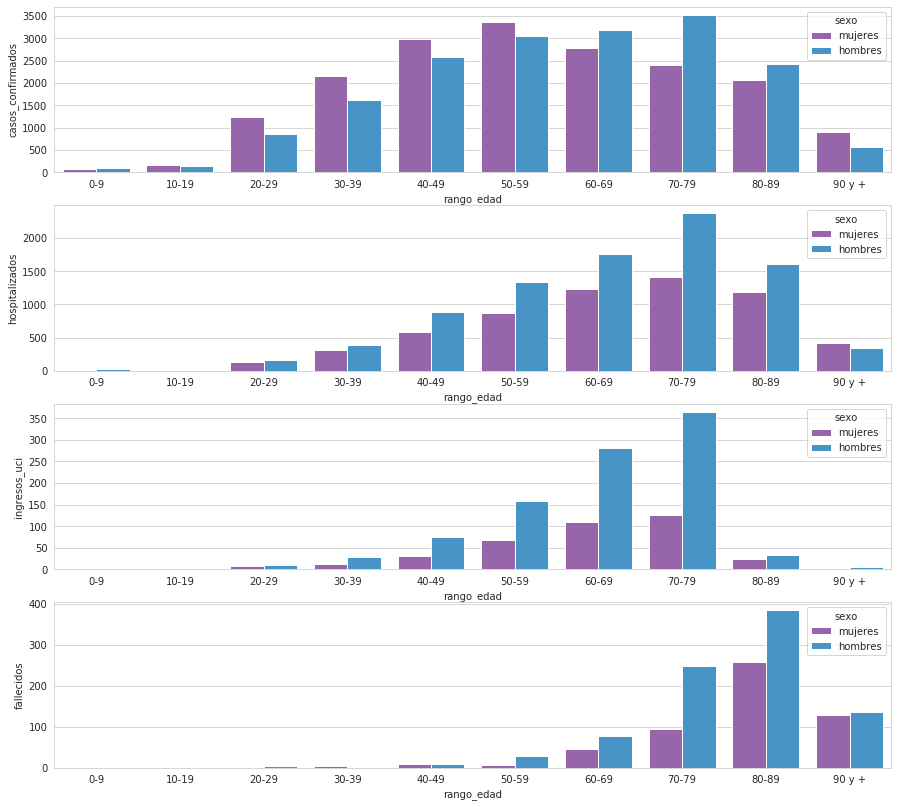

In [159]:
parameters = ['casos_confirmados','hospitalizados','ingresos_uci','fallecidos']
flatui = ["#9b59b6", "#3498db"]
fig_size = (15,14)
fig, ax = plt.subplots(4,figsize=fig_size)

for i, parameter in enumerate(parameters):
    sns.barplot(ax=ax[i],x="rango_edad", y=parameter, hue='sexo', data=spain_ages, palette=sns.color_palette(flatui));


In [167]:
# Me quedo solamente con la columna de CCAA y la ultima columna (último día)
def clean_data_last_day(data,val_name):

    data = data.iloc[:,[1,-1]]
    data = data.rename(columns={data.columns[-1]: val_name})
    data = data.set_index('CCAA')
    return data

In [176]:
# Comparaciones a dia de hoy de Altas, casos, fallecidos, hospitalizados, uci
altas = clean_data_last_day(pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_altas.csv'),'Altas')
casos = clean_data_last_day(pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos.csv'),'Casos')
fallecidos = clean_data_last_day(pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_fallecidos.csv'),'Fallecidos')
hospitalizados = clean_data_last_day(pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_hospitalizados.csv'),'Hospitalizados')
uci = clean_data_last_day(pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_uci.csv'),'Uci')


Text(0.5, 1.0, 'Numero de casos, activos y finalizados')

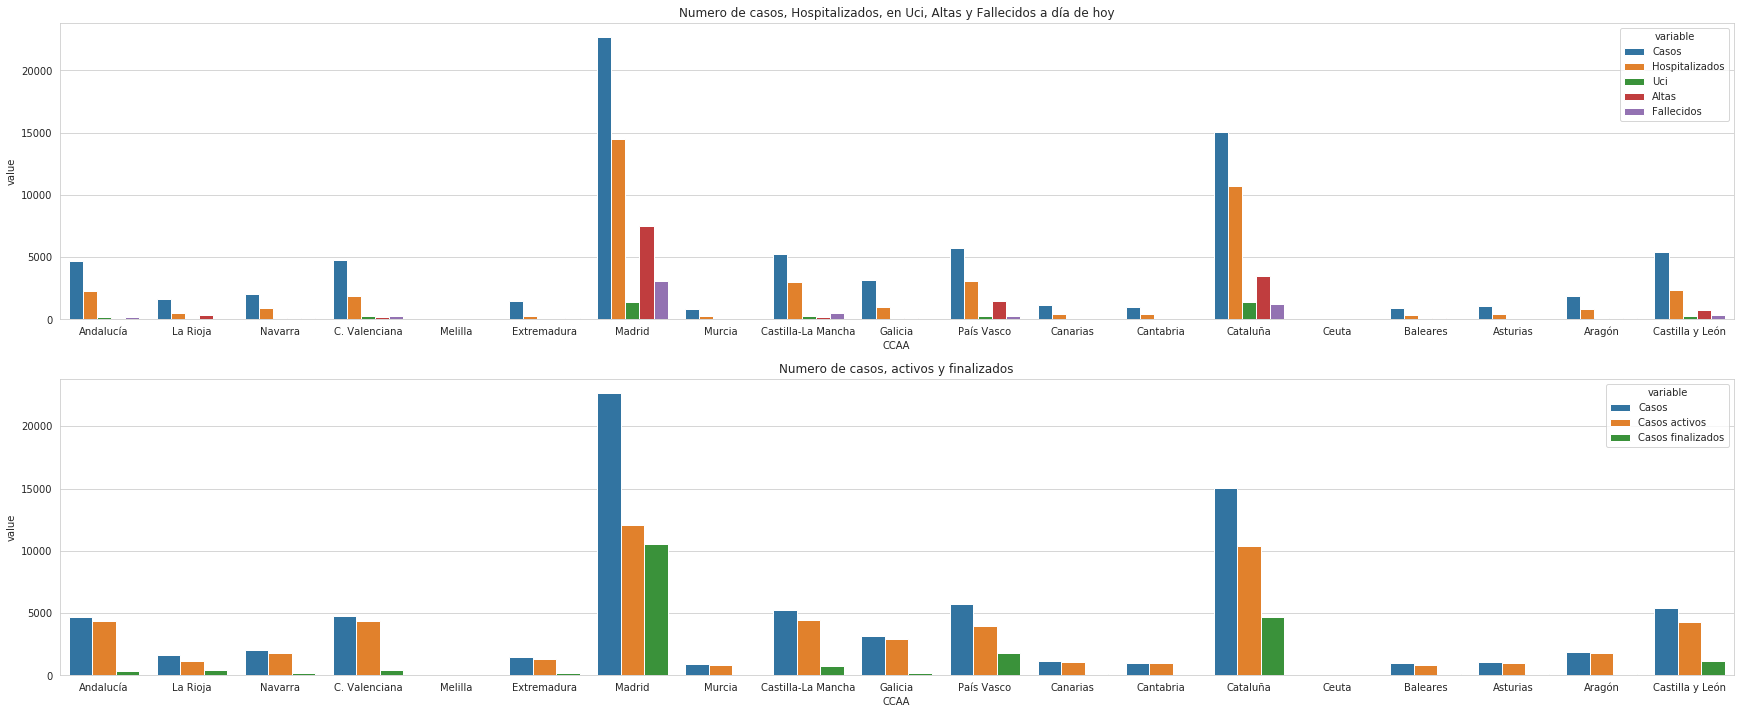

In [208]:
merged = uci.merge(hospitalizados.merge(fallecidos.merge(altas.merge(casos,left_index=True,right_index=True),left_index=True,right_index=True),left_index=True,right_index=True),left_index=True,right_index=True)
merged = merged.reset_index()
merged['Casos finalizados'] = merged['Fallecidos'] + merged ['Altas']
merged['Casos activos'] = merged['Casos'] - merged['Casos finalizados']
merged = merged.melt('CCAA')

hueorder = ['Casos', 'Hospitalizados','Uci','Altas','Fallecidos']
fig_size = (30,12)
fig, ax = plt.subplots(2,figsize=fig_size)
sns.barplot(ax=ax[0],x="CCAA", y="value", data=merged,hue='variable',order=autonomies,hue_order=hueorder)
ax[0].set_title('Numero de casos, Hospitalizados, en Uci, Altas y Fallecidos a día de hoy')
hueorder = ['Casos','Casos activos','Casos finalizados']
sns.barplot(ax=ax[1],x="CCAA", y="value", data=merged,hue='variable',order=autonomies,hue_order=hueorder)
ax[1].set_title('Numero de casos, activos y finalizados')

